In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Load the .npz file
data = np.load('histogram_data.npz')

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Verify the data
print(histogram_2d)
print(x_edges)
print(y_edges)

[[4.862610e+05 3.395700e+04 2.359400e+04 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [5.838950e+05 4.122600e+04 2.662300e+04 ... 2.000000e+00 1.000000e+00
  1.000000e+00]
 [5.889640e+05 5.013700e+04 3.400100e+04 ... 7.000000e+00 3.000000e+00
  4.000000e+00]
 ...
 [1.533896e+06 1.102500e+05 7.137600e+04 ... 2.000000e+00 2.000000e+00
  1.000000e+00]
 [1.537946e+06 1.105490e+05 7.244400e+04 ... 1.000000e+00 2.000000e+00
  2.000000e+00]
 [1.514880e+06 1.122960e+05 7.340500e+04 ... 2.000000e+00 1.000000e+00
  1.000000e+00]]
[-80.  -78.4 -76.8 -75.2 -73.6 -72.  -70.4 -68.8 -67.2 -65.6 -64.  -62.4
 -60.8 -59.2 -57.6 -56.  -54.4 -52.8 -51.2 -49.6 -48.  -46.4 -44.8 -43.2
 -41.6 -40.  -38.4 -36.8 -35.2 -33.6 -32.  -30.4 -28.8 -27.2 -25.6 -24.
 -22.4 -20.8 -19.2 -17.6 -16.  -14.4 -12.8 -11.2  -9.6  -8.   -6.4  -4.8
  -3.2  -1.6   0.    1.6   3.2   4.8   6.4   8.    9.6  11.2  12.8  14.4
  16.   17.6  19.2  20.8  22.4  24.   25.6  27.2  28.8  30.4  32.   33.6
  35.2  36.8  38.4  40.   41.6  43.

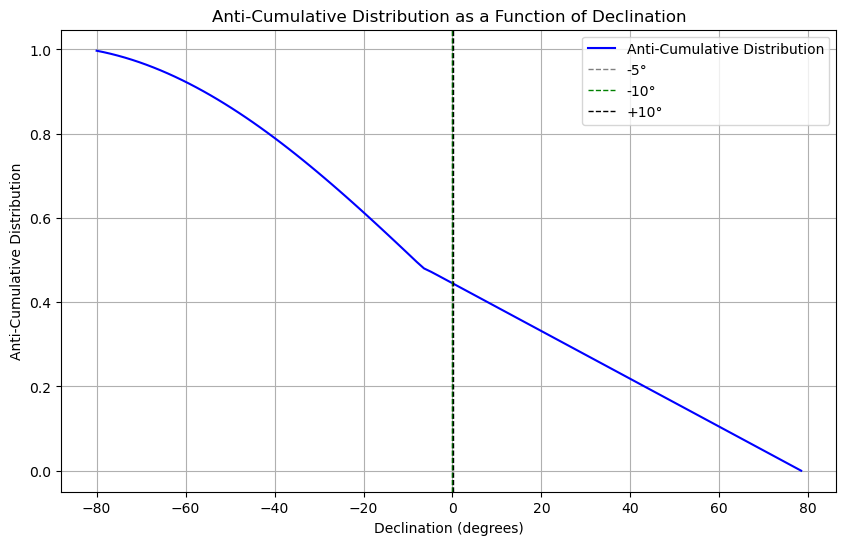

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
data = np.load('histogram_data.npz')

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Sum the histogram data along the y-axis to get the total counts for each declination
total_counts_per_declination = np.sum(histogram_2d, axis=1)

# Compute the cumulative distribution
cumulative_distribution = np.cumsum(total_counts_per_declination)
cumulative_distribution = cumulative_distribution / cumulative_distribution[-1]  # Normalize to 1

# Calculate the anti-cumulative distribution
anti_cumulative_distribution = 1 - cumulative_distribution

# Plotting the anti-cumulative distribution as a function of declination
plt.figure(figsize=(10, 6))
plt.plot(x_edges[:-1], anti_cumulative_distribution, label='Anti-Cumulative Distribution', color='blue')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=1, label='-5°')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=1, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=1, label='+10°')

plt.xlabel('Declination (degrees)')
plt.ylabel('Anti-Cumulative Distribution')
plt.title('Anti-Cumulative Distribution as a Function of Declination')
plt.legend()
plt.grid(True)
plt.show()

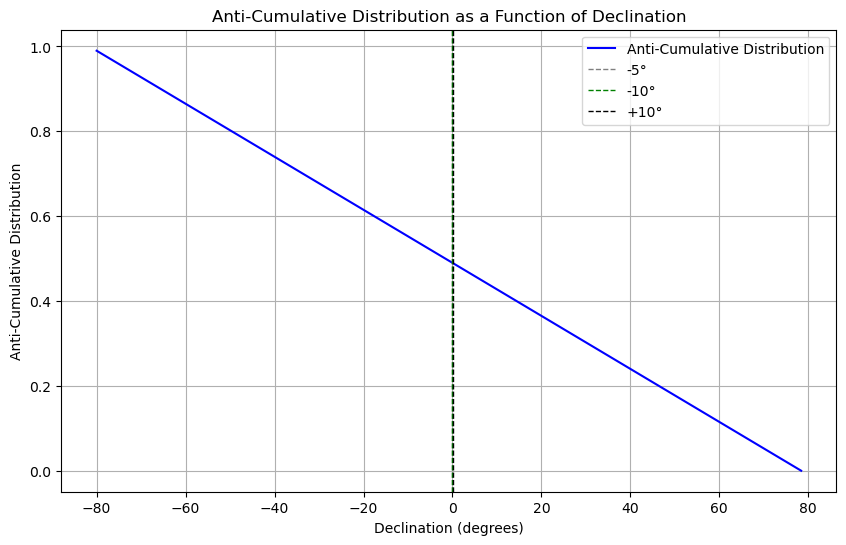

In [4]:
# Load the .npz file
data = np.load('histogram_data.npz')

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Normalize histogram_2d by the sum of counts for each declination bin
normalized_histogram_2d = np.zeros_like(histogram_2d, dtype=float)
for i in range(len(x_edges) - 1):
    total_counts = sum_dec_counts[i]
    if total_counts > 0:
        normalized_histogram_2d[i, :] = histogram_2d[i, :] / total_counts

# Compute the sum of normalized counts for each declination bin
sum_normalized_counts_per_declination = np.sum(normalized_histogram_2d, axis=1)

# Compute the cumulative distribution of the normalized counts
cumulative_distribution = np.cumsum(sum_normalized_counts_per_declination)

# Normalize the cumulative distribution to ensure it starts at 0 and ends at 1
cumulative_distribution = cumulative_distribution / cumulative_distribution[-1]

# Calculate the anti-cumulative distribution
anti_cumulative_distribution = 1 - cumulative_distribution

# Plotting the anti-cumulative distribution as a function of declination
plt.figure(figsize=(10, 6))
plt.plot(x_edges[:-1], anti_cumulative_distribution, label='Anti-Cumulative Distribution', color='blue')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=1, label='-5°')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=1, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=1, label='+10°')

plt.xlabel('Declination (degrees)')
plt.ylabel('Anti-Cumulative Distribution')
plt.title('Anti-Cumulative Distribution as a Function of Declination')
plt.legend()
plt.grid(True)
plt.show()

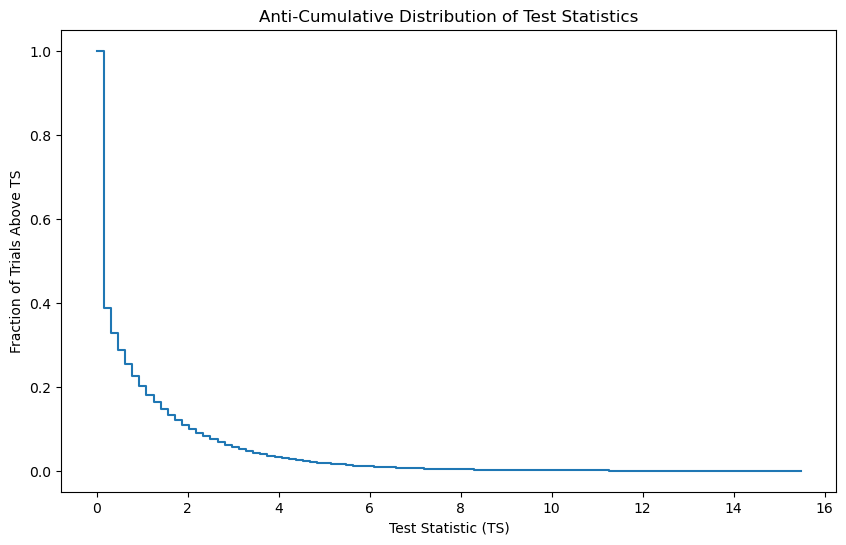

In [8]:
# Step 1: Sum along the declination axis (x-axis)
sum_hist = np.sum(histogram_2d, axis=0)

# Step 2: Calculate the cumulative sum and then the anti-cumulative distribution
cumulative_sum_hist = np.cumsum(sum_hist[::-1])[::-1]
total_trials = cumulative_sum_hist[0]
fraction_above_ts = cumulative_sum_hist / total_trials

# Step 3: Plot the anti-cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot(y_edges[:-1], fraction_above_ts, drawstyle='steps-post')
plt.xlabel('Test Statistic (TS)')
#plt.xscale('log')
plt.ylabel('Fraction of Trials Above TS')
plt.title('Anti-Cumulative Distribution of Test Statistics')
plt.grid(False)
plt.show()

Chi-squared critical value for 3-sigma significance: 11.83
Corresponding TS value: 11.89


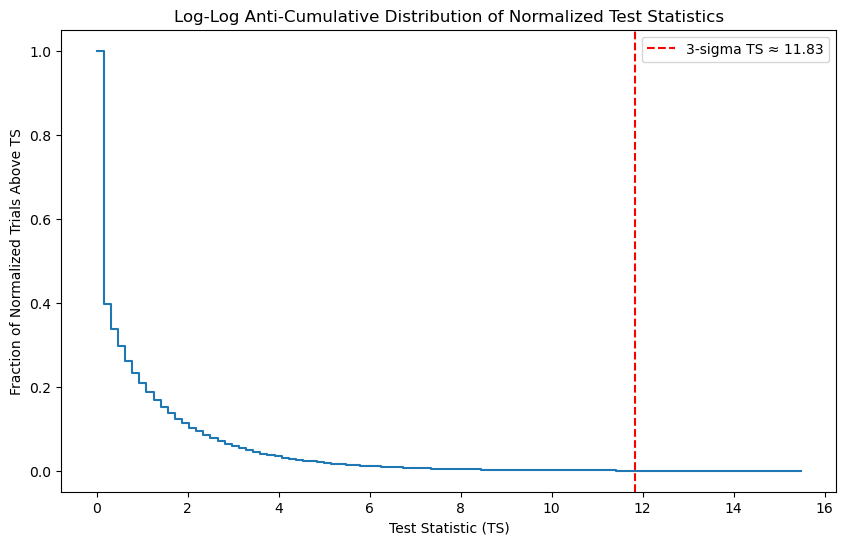

In [19]:
# Load the .npz file
data = np.load('histogram_data.npz')

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Normalize histogram_2d by the sum of counts for each declination bin
normalized_histogram_2d = np.zeros_like(histogram_2d, dtype=float)
for i in range(len(x_edges) - 1):
    total_counts = sum_dec_counts[i]
    if total_counts > 0:
        normalized_histogram_2d[i, :] = histogram_2d[i, :] / total_counts

# Sum the normalized histogram data along the declination axis (x-axis)
sum_norm_hist = np.sum(normalized_histogram_2d, axis=0)

# Calculate the cumulative sum and then the anti-cumulative distribution
cumulative_sum_norm_hist = np.cumsum(sum_norm_hist[::-1])[::-1]
total_trials_norm = cumulative_sum_norm_hist[0]
fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

# Chi-squared critical value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

# Find the TS value closest to the critical value
closest_ts_index = np.searchsorted(y_edges[:-1], critical_value, side='left')
closest_ts_value = y_edges[closest_ts_index]

print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")
print(f"Corresponding TS value: {closest_ts_value:.2f}")

# Plot the anti-cumulative distribution with log-log scale
plt.figure(figsize=(10, 6))
plt.plot(y_edges[:-1], fraction_above_ts_norm, drawstyle='steps-post')
# plt.xscale('log')
# plt.yscale('log')
plt.axvline(x=critical_value, color='r', linestyle='--', label=f'3-sigma TS ≈ {critical_value:.2f}')
plt.xlabel('Test Statistic (TS)')
plt.ylabel('Fraction of Normalized Trials Above TS')
plt.title('Anti-Cumulative Distribution of Normalized Test Statistics')
# plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

Chi-squared critical value for 3-sigma significance: 11.83


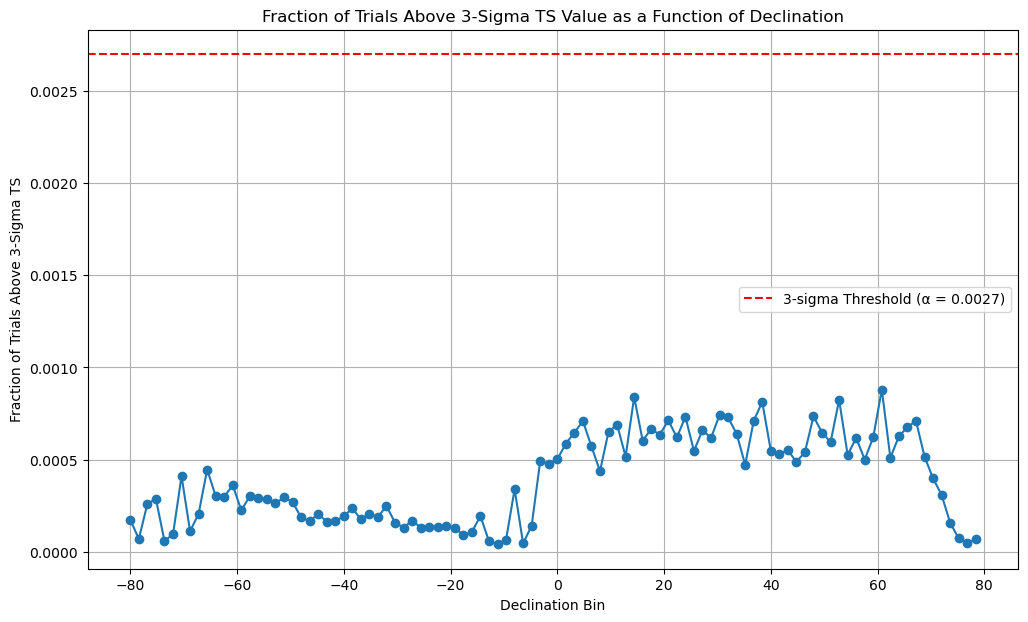

In [20]:
# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute the critical chi-squared value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")

# Compute the fraction of trials above the critical TS value for each declination bin
fraction_above_ts_per_declination = np.zeros(len(x_edges) - 1, dtype=float)

for i in range(len(x_edges) - 1):
    # For each declination bin, get the histogram data
    hist_data = histogram_2d[i, :]
    
    # Compute the fraction above the critical TS value
    fraction_above_ts = np.sum(hist_data[y_edges[:-1] >= critical_value]) / sum_dec_counts[i]
    fraction_above_ts_per_declination[i] = fraction_above_ts

# Plot the fraction of trials above the critical TS value as a function of declination
plt.figure(figsize=(12, 7))
plt.plot(x_edges[:-1], fraction_above_ts_per_declination, marker='o', linestyle='-')
plt.axhline(y=alpha, color='r', linestyle='--', label=f'3-sigma Threshold (α = {alpha:.4f})')
plt.xlabel('Declination Bin')
plt.ylabel('Fraction of Trials Above 3-Sigma TS')
plt.title('Fraction of Trials Above 3-Sigma TS Value as a Function of Declination')
plt.grid(True)
plt.legend()
plt.show()

Chi-squared critical value for 3-sigma significance: 11.83


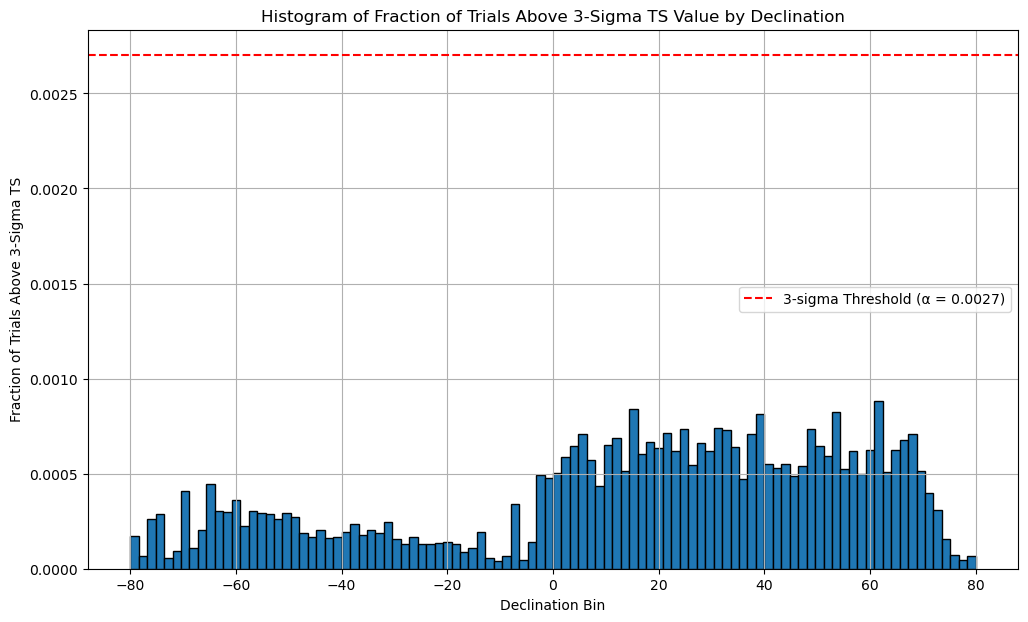

In [24]:
# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute the critical chi-squared value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027  # p-value corresponding to 3-sigma
# alpha = 0.0455  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")

# Compute the fraction of trials above the critical TS value for each declination bin
fraction_above_ts_per_declination = np.zeros(len(x_edges) - 1, dtype=float)

for i in range(len(x_edges) - 1):
    # For each declination bin, get the histogram data
    hist_data = histogram_2d[i, :]
    
    # Compute the fraction above the critical TS value
    fraction_above_ts = np.sum(hist_data[y_edges[:-1] >= critical_value]) / sum_dec_counts[i]
    fraction_above_ts_per_declination[i] = fraction_above_ts

# Plot the fraction of trials above the critical TS value as a histogram
plt.figure(figsize=(12, 7))
plt.bar(x_edges[:-1], fraction_above_ts_per_declination, width=np.diff(x_edges), edgecolor='k', align='edge')
plt.axhline(y=alpha, color='r', linestyle='--', label=f'3-sigma Threshold (α = {alpha:.4f})')
plt.xlabel('Declination Bin')
plt.ylabel('Fraction of Trials Above 3-Sigma TS')
plt.title('Histogram of Fraction of Trials Above 3-Sigma TS Value by Declination')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=1, label='-5°')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=1, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=1, label='+10°')
plt.grid()
plt.legend()
plt.show()

Chi-squared critical value for 3-sigma significance: 11.83


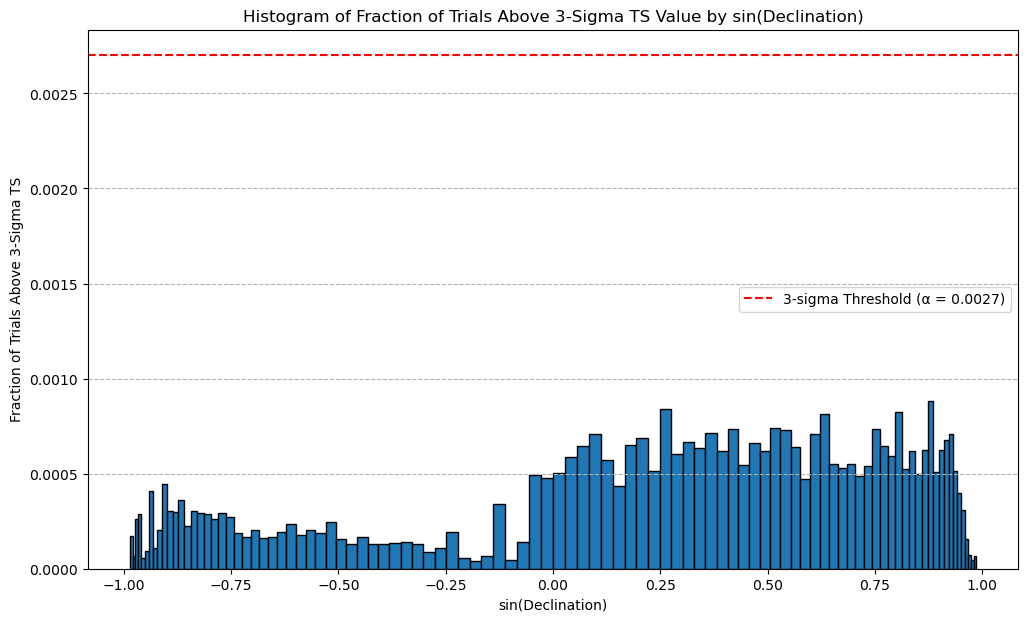

In [25]:
# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute the critical chi-squared value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")

# Convert declination edges to sine values
sin_x_edges = np.sin(np.radians(x_edges))

# Compute the fraction of trials above the critical TS value for each declination bin
fraction_above_ts_per_declination = np.zeros(len(x_edges) - 1, dtype=float)

for i in range(len(x_edges) - 1):
    # For each declination bin, get the histogram data
    hist_data = histogram_2d[i, :]
    
    # Compute the fraction above the critical TS value
    fraction_above_ts = np.sum(hist_data[y_edges[:-1] >= critical_value]) / sum_dec_counts[i]
    fraction_above_ts_per_declination[i] = fraction_above_ts

# Plot the histogram with sin(declination) on the x-axis
plt.figure(figsize=(12, 7))
plt.bar(sin_x_edges[:-1], fraction_above_ts_per_declination, width=np.diff(sin_x_edges), edgecolor='k', align='edge')
plt.axhline(y=alpha, color='r', linestyle='--', label=f'3-sigma Threshold (α = {alpha:.4f})')
plt.xlabel('sin(Declination)')
plt.ylabel('Fraction of Trials Above 3-Sigma TS')
plt.title('Histogram of Fraction of Trials Above 3-Sigma TS Value by sin(Declination)')
plt.grid(True, axis='y', linestyle='--')
plt.legend()
plt.show()

Chi-squared critical value for 3-sigma significance: 11.83


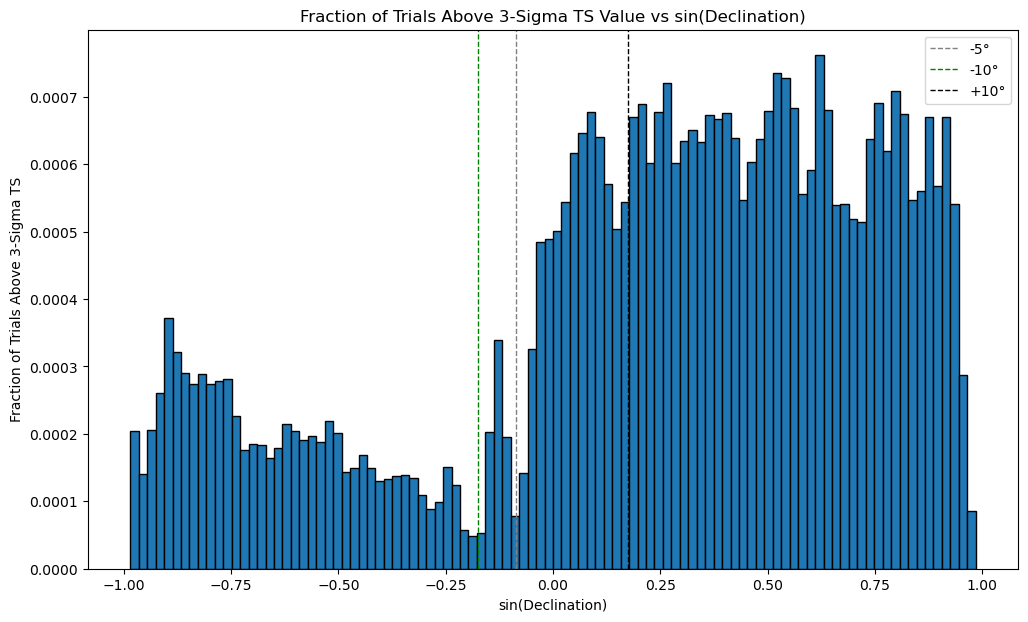

In [28]:
# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute the critical chi-squared value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")

# Convert declination edges to sine of declination
sin_x_edges = np.sin(np.radians(x_edges))

# Define uniform bins in the sine space
num_bins = len(sin_x_edges) - 1
uniform_sin_x_edges = np.linspace(sin_x_edges[0], sin_x_edges[-1], num_bins + 1)

# Initialize the fraction array
fraction_above_ts = np.zeros(num_bins)

# Fucntion for converting decliantion to sin(dec)
for i in range(num_bins):
    # Find the declination bins that correspond to the current sine bin
    decl_bin_start = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i], side='right') - 1
    decl_bin_end = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i + 1], side='right') - 1
    
    # Ensure indices are within bounds
    decl_bin_start = max(0, decl_bin_start)
    decl_bin_end = min(len(histogram_2d) - 1, decl_bin_end)
    
    # Aggregate the values from the corresponding declination bins
    total_counts = np.sum(sum_dec_counts[decl_bin_start:decl_bin_end + 1])
    counts_above_ts = np.sum([
        np.sum(histogram_2d[j, y_edges[:-1] >= critical_value]) 
        for j in range(decl_bin_start, decl_bin_end + 1)
    ])
    
    # Compute the fraction
    fraction_above_ts[i] = counts_above_ts / total_counts if total_counts > 0 else 0

# Calculate the midpoints for the bins in terms of sine declination
sin_x_midpoints = (uniform_sin_x_edges[:-1] + uniform_sin_x_edges[1:]) / 2
bin_width = uniform_sin_x_edges[1] - uniform_sin_x_edges[0]

# Plot the histogram
plt.figure(figsize=(12, 7))
plt.bar(sin_x_midpoints, fraction_above_ts, width=bin_width, align='center', edgecolor='black')
plt.xlabel('sin(Declination)')
plt.ylabel('Fraction of Trials Above 3-Sigma TS')
plt.title('Fraction of Trials Above 3-Sigma TS Value vs sin(Declination)')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=1, label='-5°')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=1, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=1, label='+10°')
plt.legend()
plt.show()

Chi-squared critical value for 3-sigma significance: 11.83


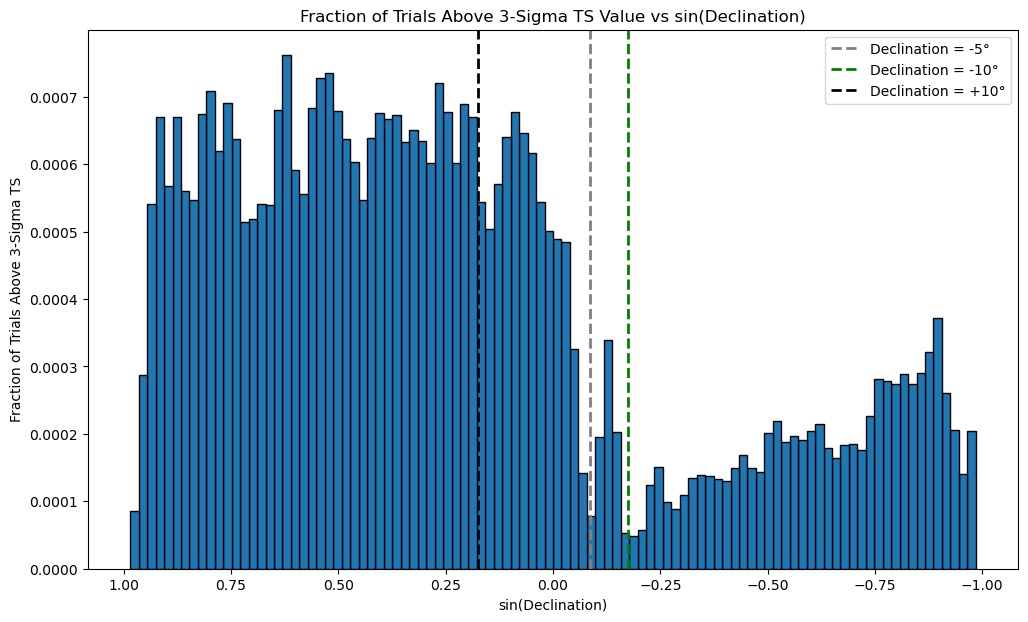

In [32]:

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute the critical chi-squared value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")

# Convert declination edges to sine of declination
sin_x_edges = np.sin(np.radians(x_edges))

# Define uniform bins in the sine space
num_bins = len(sin_x_edges) - 1
uniform_sin_x_edges = np.linspace(sin_x_edges[0], sin_x_edges[-1], num_bins + 1)

# Initialize the fraction array
fraction_above_ts = np.zeros(num_bins)

for i in range(num_bins):
    # Find the declination bins that correspond to the current sine bin
    decl_bin_start = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i], side='right') - 1
    decl_bin_end = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i + 1], side='right') - 1
    
    # Ensure indices are within bounds
    decl_bin_start = max(0, decl_bin_start)
    decl_bin_end = min(len(histogram_2d) - 1, decl_bin_end)
    
    # Aggregate the values from the corresponding declination bins
    total_counts = np.sum(sum_dec_counts[decl_bin_start:decl_bin_end + 1])
    counts_above_ts = np.sum([
        np.sum(histogram_2d[j, y_edges[:-1] >= critical_value]) 
        for j in range(decl_bin_start, decl_bin_end + 1)
    ])
    
    # Compute the fraction
    fraction_above_ts[i] = counts_above_ts / total_counts if total_counts > 0 else 0

# Calculate the midpoints for the bins in terms of sine declination
sin_x_midpoints = (uniform_sin_x_edges[:-1] + uniform_sin_x_edges[1:]) / 2
bin_width = uniform_sin_x_edges[1] - uniform_sin_x_edges[0]

# Plot the histogram
plt.figure(figsize=(12, 7))
plt.bar(sin_x_midpoints, fraction_above_ts, width=bin_width, align='center', edgecolor='black')

# Add vertical lines for specific declination values
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=2, label='Declination = -5°')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=2, label='Declination = -10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=2, label='Declination = +10°')

# Add critical value line
# plt.axhline(y=alpha, color='red', linestyle='--', linewidth=1, label=f'3-Sigma Threshold (α = {alpha:.4f})')

plt.xlabel('sin(Declination)')
plt.ylabel('Fraction of Trials Above 3-Sigma TS')
plt.title('Fraction of Trials Above 3-Sigma TS Value vs sin(Declination)')

# Reversing the x-axis
plt.gca().invert_xaxis()

# Adding a legend with relevant information
plt.legend()

# Display the plot
plt.show()